# Project: K Means Clustering on Universities.

## Table of Contents
    .Introduction to Dataset
    .Data Wrangling and Cleaning
    .EDA
    .K Means Clustering Algorithm
    .Conclusion

## Introduction to Dataset:

### About the Dataset:
This dataset shows statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

It also have 777 university with the following 19 feature

### Features:

    .Uni_Name: The name of the university
    .Private: Indicating private or puplic university
    .Apps: Number of applications recieved
    .Accept: Number of applications accepted
    .Enroll: Number of new students enrolled
    .Top10perc: Percentage of new students from top 10% of High School class
    .Top25perc: Percentage of new students from top 25% of High School class
    .F.Undergrad: Number of fulltime undergraduates
    .P.Undergrad: Number of parttime undergraduates
    .Outstate: Out of state tuition
    .Room.Board: Room and board cost
    .Books: Estimated books cost
    .Personal: Estimated personal spendings
    .PhD: Percentage of faculty with PhD's
    .Terminal: Percentage of faculty with terminal degree
    .S.F.Ratio: Student to faculty ratio
    .perc.alumni: Percentage of alumni who donate
    .Expend: Instructional expenditure
    .Grad.Rate: Graduation rate


With these features we will asking some questions:

    1. What is the precantage between Private and Puplic Universities?
    2. Which category has a higher graduation rate?
    3. What is The Distribution of tuitions across Universities?
    

### IMPORTANT:
#### Even though we have the labels for this dataset, we will apply the K Means cluster algorithm and use the labels to evaluate the Model

### Importing Libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Wrangling
In this section we will load the data, check for cleanliness, duplicated rows, any nulls, and any illogical values. and then clean the dataset for the analysis.

In [92]:
#load data
df = pd.read_csv('College_Data')
df.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


##### First thing, i'll rename the first column to be the university's name, and rename each column making them lower cased and replacing each space with "_" for consistincy

##### i'll change the values of the private columns making them either 0 or 1

In [93]:
#rename columns
df = df.rename(columns={'Unnamed: 0':'uni_name'})
df.rename(columns = lambda x : x.lower().replace(' ','_'),
          inplace = True)
df['private'] = df['private'].apply(lambda x : ['No','Yes'].index(x))
df.head(2)

,uni_name,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [94]:
#shape of data
print('The data has {} samples and {} features'.format(df.shape[0],
                                                       df.shape[1]))

The data has 777 samples and 19 features


In [95]:
#looking at columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
uni_name       777 non-null object
private        777 non-null int64
apps           777 non-null int64
accept         777 non-null int64
enroll         777 non-null int64
top10perc      777 non-null int64
top25perc      777 non-null int64
f.undergrad    777 non-null int64
p.undergrad    777 non-null int64
outstate       777 non-null int64
room.board     777 non-null int64
books          777 non-null int64
personal       777 non-null int64
phd            777 non-null int64
terminal       777 non-null int64
s.f.ratio      777 non-null float64
perc.alumni    777 non-null int64
expend         777 non-null int64
grad.rate      777 non-null int64
dtypes: float64(1), int64(17), object(1)
memory usage: 115.4+ KB


##### each columns seem to have the right datatype

In [96]:
#checking for nulls
print('The Data has a total of {} nulls'.format(df.isnull().sum().sum()))

The Data has a total of 0 nulls


In [97]:
#checking for duplicated rows
print('The number of duplicated rows:{}'.format(df.duplicated().sum()))

The number of duplicated rows:0


In [98]:
# a quick glance to see if there is ant illogical values
df.describe()

,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


##### The minimum values of the columns are right, and the maximum values as well except for the PhD's and grad.rate maximum number which are higher than 100% 
##### we will take a look at how many rows has a higher percentage than 100%, then we will correct them by assigning 100 to it

In [99]:
#rows with higher than 100% PhD faculty
print('There is {} rows with a higher than 100% in PhD faculty'.format((df['phd'] > 100).sum()))
print("and the indecies are",df[df['phd'] > 100].index[0])
df[df['phd'] > 100]

There is 1 rows with a higher than 100% in PhD faculty
and the indecies are 582


,uni_name,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
582,Texas A&M University at Galveston,0,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


In [100]:
# correcting the value and checking everything is correct
df['phd'][582] = 100
print('There is {} rows with a higher than 100% in PhD faculty'.format((df['phd'] > 100).sum()))

There is 0 rows with a higher than 100% in PhD faculty


F:\Anaconda\Anaconda_4_python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
print('There is {} rows with a higher than 100% in Graduation Rate'.format((df['grad.rate'] > 100).sum()))
print("and the indecies are",df[df['grad.rate'] > 100].index[0])
df[df['grad.rate'] > 100]

There is 1 rows with a higher than 100% in Graduation Rate
and the indecies are 95


,uni_name,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
95,Cazenovia College,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [103]:
# correcting the value and checking everything is correct
df['grad.rate'][95] = 100
print('There is {} rows with a higher than 100% in Graduation Rate'.format((df['grad.rate'] > 100).sum()))

There is 0 rows with a higher than 100% in Graduation Rate


F:\Anaconda\Anaconda_4_python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### EDA
#### Research Question 1: The Percentage of Puplic and private Universities in US 

Text(0, 0.5, 'Count')

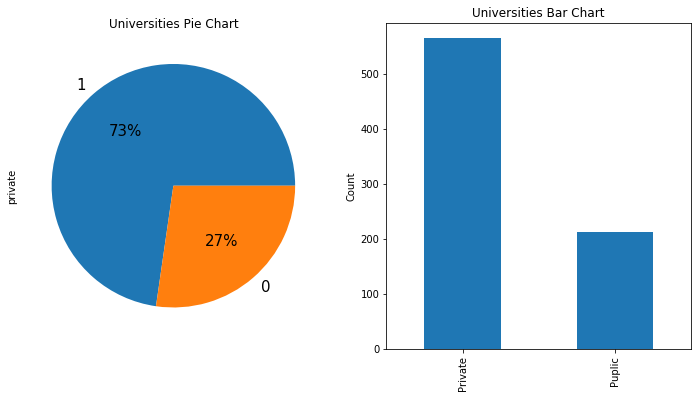

In [104]:
plt.subplot(1,2,1)
df['private'].value_counts().plot(kind = 'pie', figsize=(12,6), 
                                    fontsize=15, autopct='%1.0f%%')
plt.title('Universities Pie Chart')

###################################################################

plt.subplot(1,2,2)
df['private'].value_counts().plot(kind = 'bar', figsize=(12,6))
plt.title('Universities Bar Chart')
plt.xticks(ticks=[1, 0],labels=('Puplic','Private'))
plt.ylabel('Count')

##### There is 73% of Private Universities in the US with the count of almost 550.

#### Research Question 2:  Graduation Rate for Each Category.

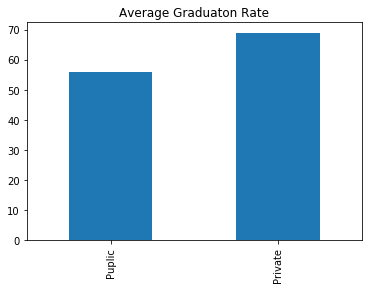

In [105]:
df.groupby(['private']).mean()['grad.rate'].plot(kind = 'bar');
plt.xticks(ticks= [0,1], labels=('Puplic','Private'));
plt.xlabel('');
plt.title('Average Graduaton Rate');

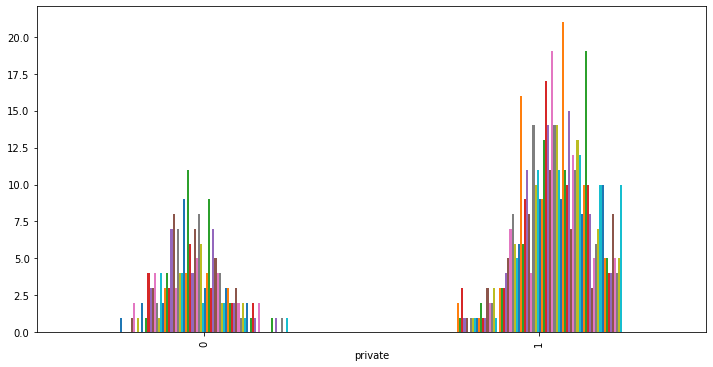

In [106]:
pd.crosstab(df['private'],df['grad.rate']).plot(kind='bar',
                                            figsize=(12,6) , legend = False);

##### The private universities has a higher graduation rate than  puplic. 

#### Research Question3: The Distribution of tuitions across Universities?
To answer this question, we will create a new column that sums up all estimated costs

In [107]:
df['tuition'] = df['outstate'] + df['room.board'] + df['books'] + df['personal']
df.head(1)

,uni_name,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate,tuition
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,13390


In [108]:
# separating the dataset to private and puplic to see each distribution on its own
priv_df = df[df['private'] == 1]
pupl_df = df[df['private'] == 0]

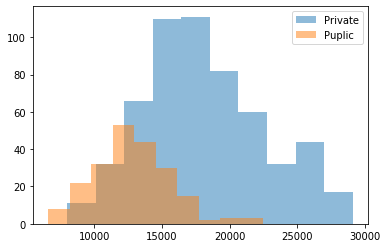

In [109]:
# plotting the disribution
plt.hist(priv_df['tuition'], alpha =0.5 ,label='Private');
plt.hist(pupl_df['tuition'], alpha =0.5 ,label='Puplic');
plt.legend();

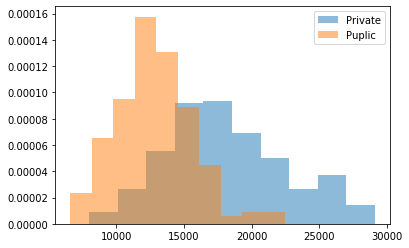

In [110]:
# showing them as proportion
plt.hist(priv_df['tuition'], alpha =0.5 ,label='Private',density=True);
plt.hist(pupl_df['tuition'], alpha =0.5 ,label='Puplic',density=True);
plt.legend();

The Private uni's has an average of 18000 and goes to a maximum of 30,000, While the puplic ones with an average of 12,000 and a maximum of 16,000  ****without including of what might seem as an outlier****

##### now that we've explored the dataset and answered some question, we are ready for the K-means Cluster Algorithm

### K Means Cluster Algorithm

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

<img src="img/img.png" width="500" />

In [130]:
list(df.columns)[2:]

['apps',
 'accept',
 'enroll',
 'top10perc',
 'top25perc',
 'f.undergrad',
 'p.undergrad',
 'outstate',
 'room.board',
 'books',
 'personal',
 'phd',
 'terminal',
 's.f.ratio',
 'perc.alumni',
 'expend',
 'grad.rate',
 'tuition']

In [131]:
from sklearn.cluster import KMeans

features = list(df.columns)[2:]
label = 'private'

#### Initiate and fit the model

In [132]:
model = KMeans(n_clusters = 2)
model.fit(df[features])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##### lookng at first five results

In [134]:
model.labels_[:5]

array([0, 1, 0, 1, 0])

#### Evaluating

In [135]:
from sklearn.metrics import confusion_matrix , classification_report, mean_absolute_error

print(confusion_matrix(df[label],model.labels_))

[[206   6]
 [340 225]]


In [136]:
print(classification_report(df[label],model.labels_))

              precision    recall  f1-score   support

           0       0.38      0.97      0.54       212
           1       0.97      0.40      0.57       565

    accuracy                           0.55       777
   macro avg       0.68      0.68      0.55       777
weighted avg       0.81      0.55      0.56       777



In [137]:
print(mean_absolute_error(df[label],model.labels_))

0.4453024453024453


## Conclusion

This dataset shows statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

It also have 777 university with the following 19 feature,

This code uses pandas and matplotlib with good documentation at each step.

After cleaning our dataset we asked these questions:
1. What is the precantage between Private and Puplic Universities?
    
        There is 73% of Private Universities in the US with the count of almost 550.
2. Which category has a higher graduation rate?
    
        The private universities has a higher graduation rate than puplic.
3. What is The Distribution of tuitions across Universities?
    
        The Private uni's has an average of 18000 and goes to a maximum of 30,000, While the puplic ones with an average of 12,000 and a maximum of 16,000 without including of what might seem as an outlier

we used a KMeans Cluster algorithm:

    The K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.